# MLFLOW setup in Jupyter Notebook

This notebook contains a small Data Science Project where MLFlow is used to log all Feature Engineering and Modeling Parameters as well as Metrics.



## Loading Data

In [2]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import mlflow

from modeling.config import EXPERIMENT_NAME
#TRACKING_URI = open("../.mlflow_uri").read().strip()

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.filterwarnings('ignore')
# Specifing figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)


To make a better approximation on inputing the NAN values, I will have to look at the Alloy tipe column, so to know how much of the element is suppose to be on this alloy and therefore try to inpute it with a linear regression base on normal occurence of the metal by alloy

## Trainining the model and tracking with MLFlow

In [71]:
# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.start_run()
run = mlflow.active_run()

NameError: name 'TRACKING_URI' is not defined

In [ ]:
print("Active run_id: {}".format(run.info.run_id))

The data doesnt got a clear tendency, then i will agroupate by kmeans to see the relative association of the data

# Clustering

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Globular clusters

In [5]:
Corr_cluster= pd.read_csv("../data/Alloy_Inter.csv")

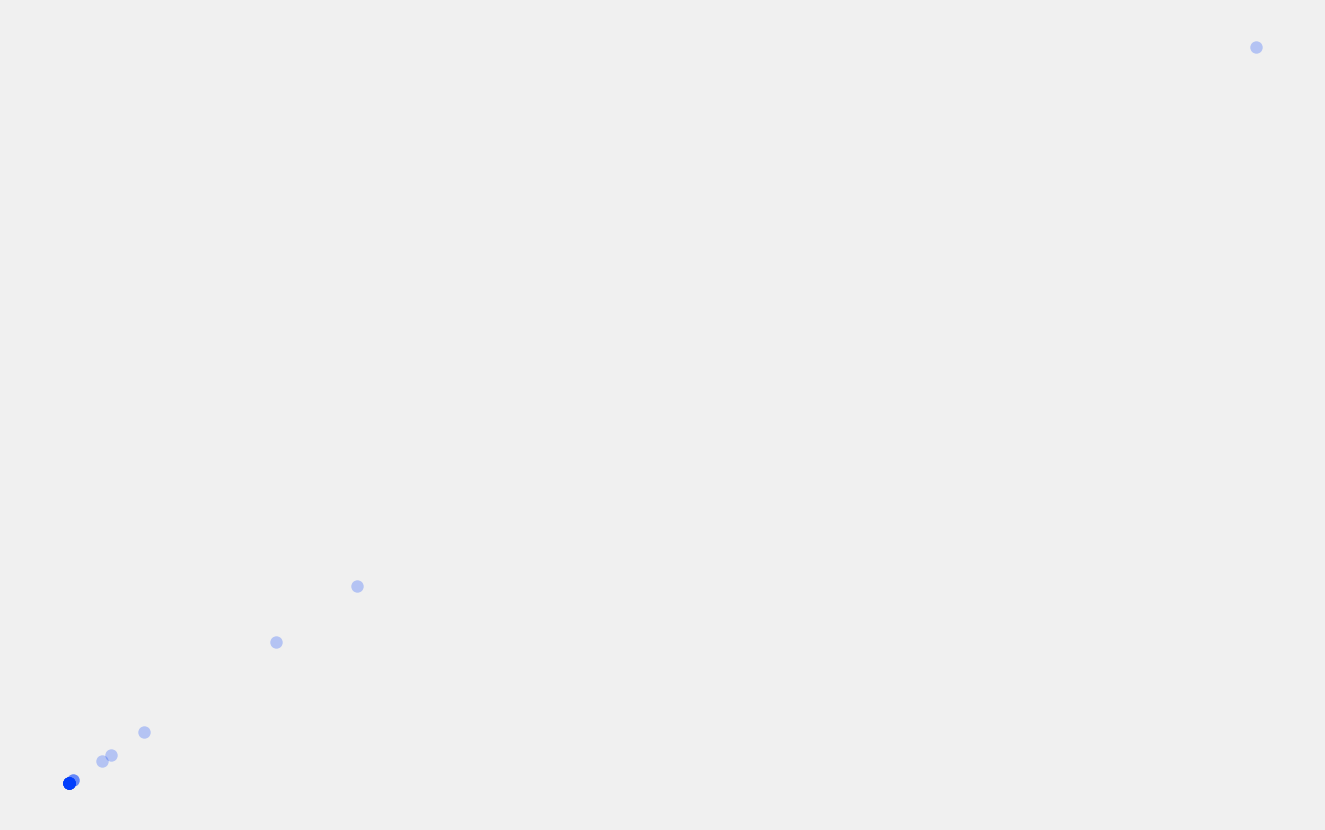

In [6]:
# Visualizing the data
plt.scatter(Corr_cluster.T[0], Corr_cluster.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [7]:
Corr_cluster.head(10)

,Cl,Test_Temp,pH,M_Al,M_Fe,M_HEA,M_NiCrMo,M_Other,Fe,Cr,...,Ta,Re,Ce,Ti,Co,B,Mg,Y,Gd,Epit
0,0.005133,50.0,7.8,0.0,1.0,0.0,0.0,0.0,69.70,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0
1,0.008556,50.0,7.8,0.0,1.0,0.0,0.0,0.0,69.70,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260.0
2,0.017112,50.0,7.8,0.0,1.0,0.0,0.0,0.0,69.70,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0
3,0.085558,50.0,7.8,0.0,1.0,0.0,0.0,0.0,69.70,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0
4,0.546000,50.0,8.2,0.0,1.0,0.0,0.0,0.0,69.70,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
5,0.005133,50.0,7.8,0.0,1.0,0.0,0.0,0.0,67.54,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344.0
6,0.008556,50.0,7.8,0.0,1.0,0.0,0.0,0.0,67.54,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0
7,0.017112,50.0,7.8,0.0,1.0,0.0,0.0,0.0,67.54,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284.0
8,0.085558,50.0,7.8,0.0,1.0,0.0,0.0,0.0,67.54,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0
9,0.546000,50.0,8.2,0.0,1.0,0.0,0.0,0.0,67.54,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0


In [345]:
# defining a utility function for testing the clustering algorithms
def plot_clusters(Corr_cluster algorithm, kwds):
    # cluster the data while taking the time the process needs 
    start_time = time.time()
    labels = algorithm(**kwds).fit_predict(X_test)
    end_time = time.time()
    
    # defining the colors for visual representation
    palette = sns.color_palette('bright', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    # plotting the data, removing the axis and adding title and time 
    plt.scatter(X_train_scaled.T[0], X_train_scaled.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    plt.show()

## WCSS ( Within-Cluster Sum of Square ) to know how is clustered the data

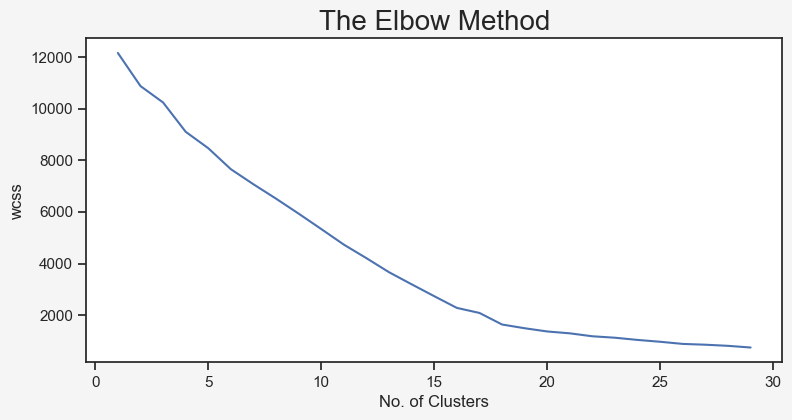

In [ ]:
wcss = []
for i in range(1, 30):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 8, random_state = 42)
    km.fit(X_train_scaled)
    wcss.append(km.inertia_)
fig=plt.figure(figsize=(8,4))  
fig.patch.set_facecolor('#f6f5f5')
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#k-means selected cols = Me
selected_cols= ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta', 'Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']
cluster_data = X_train_scaled.loc[:, selected_cols]

The elbow shape has predicted 15 clusters as optimal, now we train the model on the dataset with 4 clusters

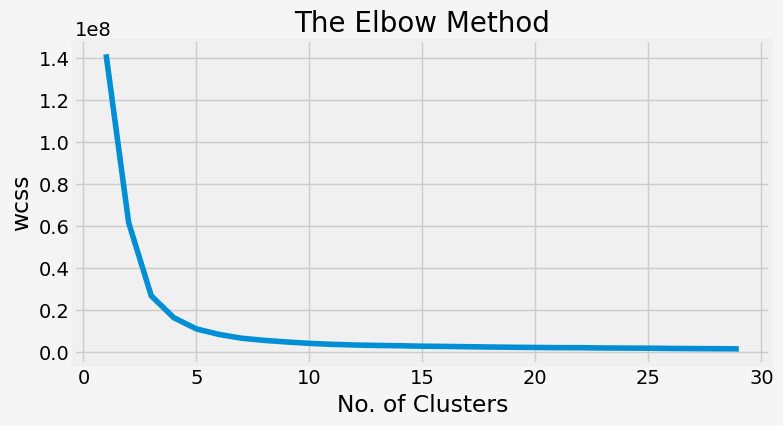

In [8]:
wcss = []
for i in range(1, 30):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 8, random_state = 42)
    km.fit(Corr_cluster)
    wcss.append(km.inertia_)
fig=plt.figure(figsize=(8,4))  
fig.patch.set_facecolor('#f6f5f5')
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans_sel = KMeans (init='k-means++',n_clusters=16,n_init=100, random_state=42).fit(X_train_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign (Cluster=labels)

In [ ]:
scatters= scatters(clustered_data, h="Cluster")
#doest work

NameError: name 'scatters' is not defined

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]), 0)' is an invalid key

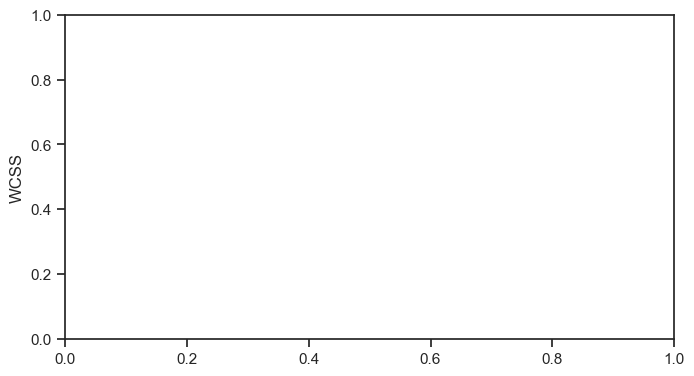

In [ ]:
kmeans = KMeans(n_clusters = 15, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_scaled)
plt.ylabel('WCSS') 
#plt.show() # Training the K-Means model on the dataset kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Fe)')
plt.ylabel('Epit')
plt.legend() 
plt.show()

In [ ]:
#plot_clusters(X, KMeans, {'n_clusters':6})
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(x=X["Cr"], y = Corr_Me_fnet["Epit"], palette='viridis')

for loc in ['right', 'top']:
    ax.spines[loc].set_visible(False)
 

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Cr')
plt.ylabel('Epit')
plt.legend()
plt.show()

In [ ]:
#seting parameters that should be logged on MLFlow
#these parameters were used in feature engineering (inputing missing values)
#or parameters of the model (fit_intercept for Linear Regression model)
params = {
      "altitude_low_meters_mean": altitude_low_meters_mean,
      "altitude_high_meters_mean": altitude_high_meters_mean,
      "altitude_mean_log_mean": altitude_mean_log_mean,
      "fit_intercept": True,
  }

In [ ]:
#logging params to mlflow
mlflow.log_params(params)
#setting tags
mlflow.set_tag("running_from_jupyter", "True")
#logging metrics
mlflow.log_metric("train-" + "MSE", mse_train)
mlflow.log_metric("test-" + "MSE", mse_test)
# logging the model to mlflow will not work without a AWS Connection setup.. too complex for now
# but possible if running mlflow locally
# mlflow.log_artifact("../models")
# mlflow.sklearn.log_model(reg, "model")
mlflow.end_run()

In [ ]:
mlflow.get_run(run_id=run.info.run_id)

## Checking the experiments

while the next cell is running you will not be able to run other cells in the notebook

In [ ]:
!mlflow ui